# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = [] 

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
#set the units to metric 
units = "metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | piacabucu
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | yuzhno-kurilsk
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | muhos
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | crane
Processing Record 17 of Set 1 | nova vicosa
Processing Record 18 of Set 1 | keffi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | aldan
Processing Record

Processing Record 40 of Set 4 | sishilichengzi
City not found. Skipping...
Processing Record 41 of Set 4 | petropavlovsk-kamchatsky
Processing Record 42 of Set 4 | ulaangom
Processing Record 43 of Set 4 | timbuktu
Processing Record 44 of Set 4 | lihue
Processing Record 45 of Set 4 | constantia
Processing Record 46 of Set 4 | mumford
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | tsiombe
Processing Record 0 of Set 5 | bodo
Processing Record 1 of Set 5 | holualoa
Processing Record 2 of Set 5 | saipan
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | wynyard
Processing Record 5 of Set 5 | soio
Processing Record 6 of Set 5 | ngaoundere
Processing Record 7 of Set 5 | punta arenas
Processing Record 8 of Set 5 | bandarbeyla
Processing Record 9 of Set 5 | gadzhiyevo
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | godean
Processing Record 12 of Set 5 | flying fish cove
Proces

Processing Record 32 of Set 8 | saint croix
Processing Record 33 of Set 8 | catio
Processing Record 34 of Set 8 | domodossola
Processing Record 35 of Set 8 | strabane
Processing Record 36 of Set 8 | kurmuk
Processing Record 37 of Set 8 | puerto armuelles
Processing Record 38 of Set 8 | correntina
Processing Record 39 of Set 8 | amga
Processing Record 40 of Set 8 | okhotsk
Processing Record 41 of Set 8 | kokstad
Processing Record 42 of Set 8 | pilar
Processing Record 43 of Set 8 | kristiansund
Processing Record 44 of Set 8 | betio village
Processing Record 45 of Set 8 | karratha
Processing Record 46 of Set 8 | tadine
Processing Record 47 of Set 8 | dire dawa
Processing Record 48 of Set 8 | kapit
Processing Record 49 of Set 8 | prado
Processing Record 0 of Set 9 | huarmey
Processing Record 1 of Set 9 | dangriga
Processing Record 2 of Set 9 | antigonish
Processing Record 3 of Set 9 | cooper's town
Processing Record 4 of Set 9 | kuqa
Processing Record 5 of Set 9 | alekseyevskoye
Processing

Processing Record 23 of Set 12 | naracoorte
Processing Record 24 of Set 12 | nieuw amsterdam
Processing Record 25 of Set 12 | port-vila
Processing Record 26 of Set 12 | novoorsk
Processing Record 27 of Set 12 | kolosovka
Processing Record 28 of Set 12 | kapa'a
Processing Record 29 of Set 12 | yeosu
Processing Record 30 of Set 12 | burgkirchen an der alz
Processing Record 31 of Set 12 | sierra vista
Processing Record 32 of Set 12 | tizimin
Processing Record 33 of Set 12 | arkalyk
Processing Record 34 of Set 12 | nizwa
Processing Record 35 of Set 12 | hancheng
Processing Record 36 of Set 12 | revelstoke
Processing Record 37 of Set 12 | hasaki
Processing Record 38 of Set 12 | puerto aysen
Processing Record 39 of Set 12 | nurota
Processing Record 40 of Set 12 | mount pearl
Processing Record 41 of Set 12 | kudahuvadhoo
Processing Record 42 of Set 12 | suva
Processing Record 43 of Set 12 | belmonte
Processing Record 44 of Set 12 | maicanesti
-----------------------------
Data Retrieval Compl

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.03,65,27,8.86,SH,1683740521
1,ribeira grande,38.5167,-28.7000,20.22,68,20,4.12,PT,1683740521
2,piacabucu,-10.4056,-36.4344,29.37,61,45,4.62,BR,1683740521
3,tiksi,71.6872,128.8694,-19.86,95,16,4.46,RU,1683740522
4,adamstown,-25.0660,-130.1015,22.30,62,100,9.72,PN,1683740522


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.03,65,27,8.86,SH,1683740521
1,ribeira grande,38.5167,-28.7000,20.22,68,20,4.12,PT,1683740521
2,piacabucu,-10.4056,-36.4344,29.37,61,45,4.62,BR,1683740521
3,tiksi,71.6872,128.8694,-19.86,95,16,4.46,RU,1683740522
4,adamstown,-25.0660,-130.1015,22.30,62,100,9.72,PN,1683740522


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

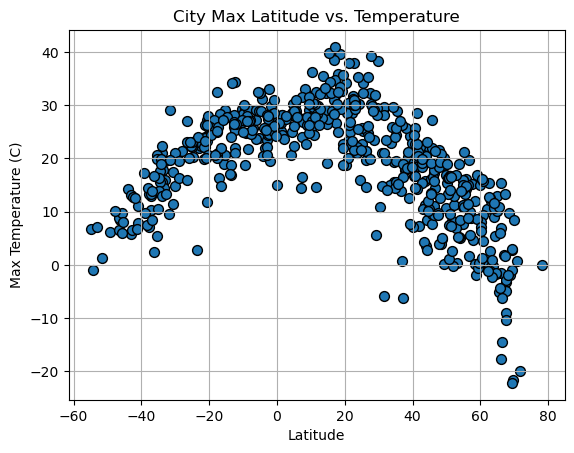

In [64]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,s= 50,  edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

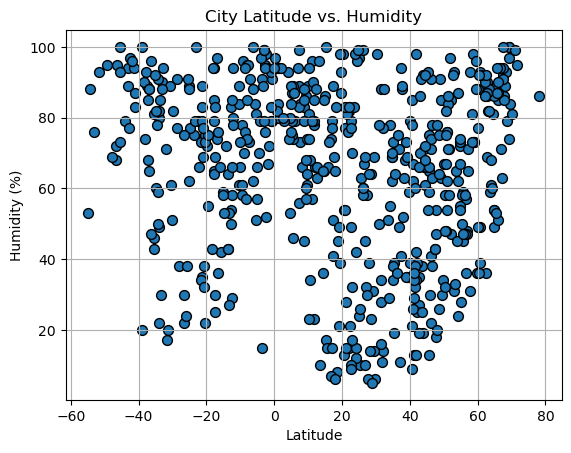

In [73]:
# Build the scatter plots for latitude vs. humidity
X = city_data_df["Lat"]
Y = city_data_df["Humidity"]
plt.scatter(X, Y, s = 50, edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

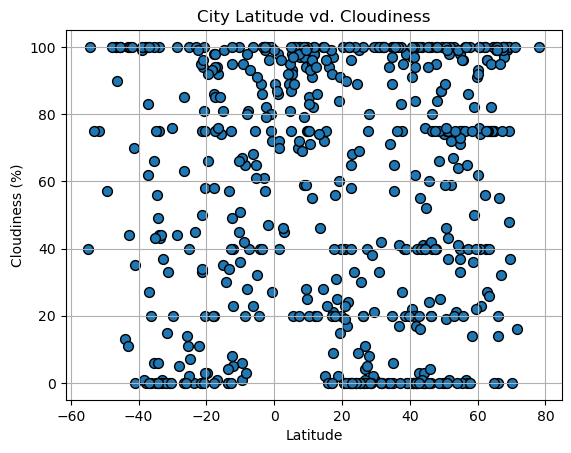

In [74]:
# Build the scatter plots for latitude vs. cloudiness
x= city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y , s= 50, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vd. Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

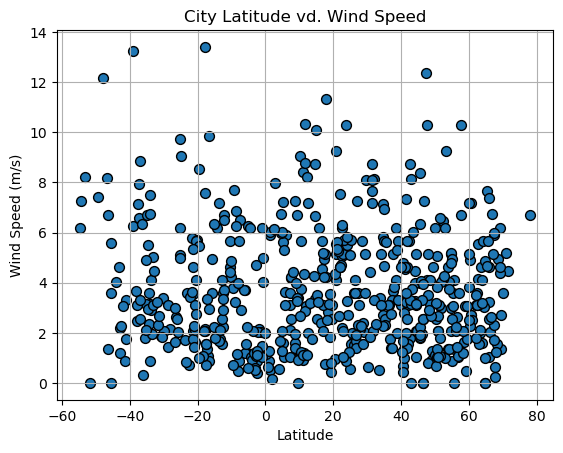

In [76]:
# Build the scatter plots for latitude vs. wind speed
X_axis = city_data_df["Lat"]
Y_axis = city_data_df["Wind Speed"]
plt.scatter(X_axis, Y_axis, s =50, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vd. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE